# Topic: Research on Strip Checking in Minors

##### Dataset: https://data.torontopolice.on.ca/datasets/TorontoPS::arrests-and-strip-searches-rbdc-arr-tbl-001/about

## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math
from scipy.stats import f_oneway
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df.head()

Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  ...  \
0   M   Aged 35 to 44 years                     Not a youth           54  ...   
1   M   Aged 35 to 44 years                     Not a youth           54  ...   
2   M   Aged 35 to 44 years                     Not a youth           54  ...   
3   M   Aged 25 to 34 years                     Not a youth           XX  ...   
4   M   Aged 25 to 34 years                     Not a youth           XX  ...   

   Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
0                               0                                1   
1                               0                                0   
2                               0                                0   
3                               0                                0   
4                               0                                0   

   SearchReason_CauseInjury  SearchReason_AssistEscape  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

   SearchReason_PossessWeapons  SearchReason_PossessEvidence  ItemsFound  \
0                          NaN                           NaN         NaN   
1                          NaN                           NaN         NaN   
2                          NaN                           NaN         NaN   
3                          NaN                           NaN         NaN   
4                          NaN                           NaN         NaN   

   ObjectId  
0         1  
1         2  
2         3  
3         4  
4         5  

[5 rows x 25 columns]

## Descriptive Statistics 

In [3]:
print(len(df.columns))
print(df.columns)

25
Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')


In [4]:
df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [5]:
print(df.groupby('Age_group__at_arrest_',as_index=True)['Age_group__at_arrest_'].count())

Age_group__at_arrest_
Aged 17 years and under       1361
Aged 17 years and younger     1681
Aged 18 to 24 years          10041
Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 65 and older              624
Aged 65 years and older        698
Name: Age_group__at_arrest_, dtype: int64


In [6]:
print(df.groupby('Perceived_Race',as_index=True)['Perceived_Race'].count())

Perceived_Race
Black                   17526
East/Southeast Asian     4415
Indigenous               1934
Latino                   1768
Middle-Eastern           3237
South Asian              3613
Unknown or Legacy        5056
White                   27723
Name: Perceived_Race, dtype: int64


In [7]:
print(df.groupby('Sex',as_index=True)['Sex'].count())

Sex
F    12617
M    52650
U        9
Name: Sex, dtype: int64


In [8]:
print(df.groupby('SearchReason_CauseInjury',as_index=True)['SearchReason_CauseInjury'].count())

SearchReason_CauseInjury
0.0    1828
1.0    5973
Name: SearchReason_CauseInjury, dtype: int64


In [9]:
print(df.groupby('SearchReason_AssistEscape',as_index=True)['SearchReason_AssistEscape'].count())

SearchReason_AssistEscape
0.0    5124
1.0    2677
Name: SearchReason_AssistEscape, dtype: int64


In [10]:
print(df.groupby('SearchReason_PossessWeapons',as_index=True)['SearchReason_PossessWeapons'].count())

SearchReason_PossessWeapons
0.0    4264
1.0    3537
Name: SearchReason_PossessWeapons, dtype: int64


In [11]:
print(df.groupby('SearchReason_PossessEvidence',as_index=True)['SearchReason_PossessEvidence'].count())

SearchReason_PossessEvidence
0.0    4533
1.0    3268
Name: SearchReason_PossessEvidence, dtype: int64


# RQ1: Likelihood of Strip Check based on Race and Gender in Minors

In [12]:
#Create a new numerical variable and change categorical variables to string type
df1=df[df['StripSearch']==1]
df2=df1.groupby('PersonID',as_index=False)['PersonID'].agg({'No_time_StripSearched':'count'})
result=pd.merge(df2,df1,on=['PersonID'])
result[['Sex','Age_group__at_arrest_','Perceived_Race']]=result[['Sex','Age_group__at_arrest_','Perceived_Race']].astype('string')
result.head(2)

PersonID  No_time_StripSearched  Arrest_Year Arrest_Month  EventID  \
0    300003                      1         2020     Apr-June  1058473   
1    300007                      1         2020    July-Sept  1022252   

    ArrestID Perceived_Race Sex Age_group__at_arrest_  \
0  6060061.0          White   M   Aged 25 to 34 years   
1  6013017.0    South Asian   M   Aged 25 to 34 years   

  Youth_at_arrest__under_18_years  ... Actions_at_arrest___Resisted__d  \
0                     Not a youth  ...                               0   
1                     Not a youth  ...                               0   

   Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
0                                0                                0   
1                                0                                0   

  Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
0                               0                       1.0   
1                               0                       1.0   

   SearchReason_AssistEscape  SearchReason_PossessWeapons  \
0                        0.0                          1.0   
1                        1.0                          0.0   

   SearchReason_PossessEvidence  ItemsFound  ObjectId  
0                           0.0         0.0     55641  
1                           0.0         1.0     50361  

[2 rows x 26 columns]

In [13]:
result.describe()

PersonID  No_time_StripSearched  Arrest_Year       EventID  \
count    7801.000000            7801.000000  7801.000000  7.801000e+03   
mean   318653.277913               2.496988  2020.087937  1.030210e+06   
std     10861.539850               2.239968     0.283222  1.730106e+04   
min    300003.000000               1.000000  2020.000000  1.000006e+06   
25%    309375.000000               1.000000  2020.000000  1.015301e+06   
50%    318556.000000               2.000000  2020.000000  1.030253e+06   
75%    328146.000000               3.000000  2020.000000  1.045268e+06   
max    337344.000000              17.000000  2021.000000  1.060002e+06   

           ArrestID  StripSearch       Booked  \
count  7.332000e+03       7801.0  7801.000000   
mean   6.032598e+06          1.0     0.926676   
std    1.858952e+04          0.0     0.260684   
min    6.000009e+06          1.0     0.000000   
25%    6.016466e+06          1.0     1.000000   
50%    6.032846e+06          1.0     1.000000   
75%    6.048620e+06          1.0     1.000000   
max    6.064797e+06          1.0     1.000000   

       Actions_at_arrest___Concealed_i  Actions_at_arrest___Combative__  \
count                      7801.000000                      7801.000000   
mean                          0.014614                         0.086143   
std                           0.120008                         0.280593   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
count                      7801.000000                      7801.000000   
mean                          0.063069                         0.076016   
std                           0.243102                         0.265041   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
count                      7801.000000                      7801.000000   
mean                          0.014229                         0.420715   
std                           0.118441                         0.493706   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         1.000000   
max                           1.000000                         1.000000   

       SearchReason_CauseInjury  SearchReason_AssistEscape  \
count               7801.000000                7801.000000   
mean                   0.765671                   0.343161   
std                    0.423606                   0.474795   
min                    0.000000                   0.000000   
25%                    1.000000                   0.000000   
50%                    1.000000                   0.000000   
75%                    1.000000                   1.000000   
max                    1.000000                   1.000000   

       SearchReason_PossessWeapons  SearchReason_PossessEvidence   ItemsFound  \
count                  7801.000000                   7801.000000  7801.000000   
mean                      0.453403                      0.418921     0.373157   
std                       0.497856                      0.493414     0.48

### Exploratory Data Analysis

In [14]:
result.describe()

PersonID  No_time_StripSearched  Arrest_Year       EventID  \
count    7801.000000            7801.000000  7801.000000  7.801000e+03   
mean   318653.277913               2.496988  2020.087937  1.030210e+06   
std     10861.539850               2.239968     0.283222  1.730106e+04   
min    300003.000000               1.000000  2020.000000  1.000006e+06   
25%    309375.000000               1.000000  2020.000000  1.015301e+06   
50%    318556.000000               2.000000  2020.000000  1.030253e+06   
75%    328146.000000               3.000000  2020.000000  1.045268e+06   
max    337344.000000              17.000000  2021.000000  1.060002e+06   

           ArrestID  StripSearch       Booked  \
count  7.332000e+03       7801.0  7801.000000   
mean   6.032598e+06          1.0     0.926676   
std    1.858952e+04          0.0     0.260684   
min    6.000009e+06          1.0     0.000000   
25%    6.016466e+06          1.0     1.000000   
50%    6.032846e+06          1.0     1.000000   
75%    6.048620e+06          1.0     1.000000   
max    6.064797e+06          1.0     1.000000   

       Actions_at_arrest___Concealed_i  Actions_at_arrest___Combative__  \
count                      7801.000000                      7801.000000   
mean                          0.014614                         0.086143   
std                           0.120008                         0.280593   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Resisted__d  Actions_at_arrest___Mental_inst  \
count                      7801.000000                      7801.000000   
mean                          0.063069                         0.076016   
std                           0.243102                         0.265041   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           1.000000                         1.000000   

       Actions_at_arrest___Assaulted_o  Actions_at_arrest___Cooperative  \
count                      7801.000000                      7801.000000   
mean                          0.014229                         0.420715   
std                           0.118441                         0.493706   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         1.000000   
max                           1.000000                         1.000000   

       SearchReason_CauseInjury  SearchReason_AssistEscape  \
count               7801.000000                7801.000000   
mean                   0.765671                   0.343161   
std                    0.423606                   0.474795   
min                    0.000000                   0.000000   
25%                    1.000000                   0.000000   
50%                    1.000000                   0.000000   
75%                    1.000000                   1.000000   
max                    1.000000                   1.000000   

       SearchReason_PossessWeapons  SearchReason_PossessEvidence   ItemsFound  \
count                  7801.000000                   7801.000000  7801.000000   
mean                      0.453403                      0.418921     0.373157   
std                       0.497856                      0.493414     0.48

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 7800
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PersonID                         7801 non-null   int64  
 1   No_time_StripSearched            7801 non-null   int64  
 2   Arrest_Year                      7801 non-null   int64  
 3   Arrest_Month                     7801 non-null   object 
 4   EventID                          7801 non-null   int64  
 5   ArrestID                         7332 non-null   float64
 6   Perceived_Race                   7800 non-null   string 
 7   Sex                              7801 non-null   string 
 8   Age_group__at_arrest_            7801 non-null   string 
 9   Youth_at_arrest__under_18_years  7801 non-null   object 
 10  ArrestLocDiv                     7801 non-null   object 
 11  StripSearch                      7801 non-null   int64  
 12  Booked              

In [16]:
#Drop rows with missing values
#print(df.isnull().sum())
df=df.dropna()

# Show unique values
#print(result.Sex.unique())
#print(result.Perceived_Race.unique())
#print(result.Age_group__at_arrest_.unique())

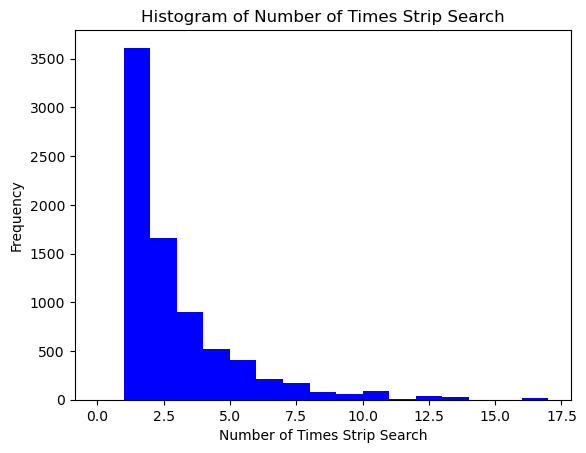

In [17]:
# Create the Histogram
plt.hist(result['No_time_StripSearched'],bins=range(0,max(result['No_time_StripSearched'])+1),color='blue')
plt.xlabel('Number of Times Strip Search')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Times Strip Search')
plt.show()

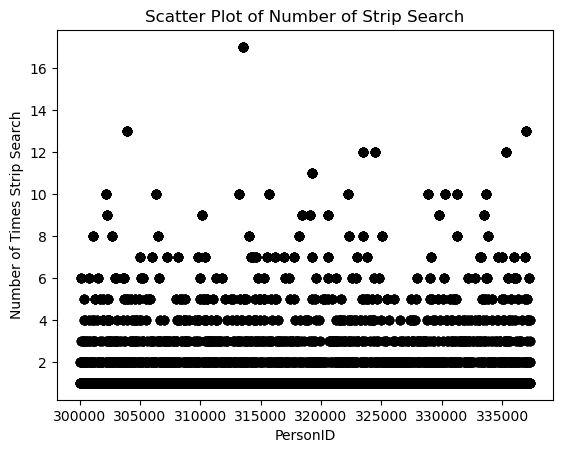

In [18]:
# Create the Scatterplot
plt.scatter(result['PersonID'],result['No_time_StripSearched'],color='black')
plt.xlabel('PersonID')
plt.ylabel('Number of Times Strip Search')
plt.title('Scatter Plot of Number of Strip Search')
plt.show()

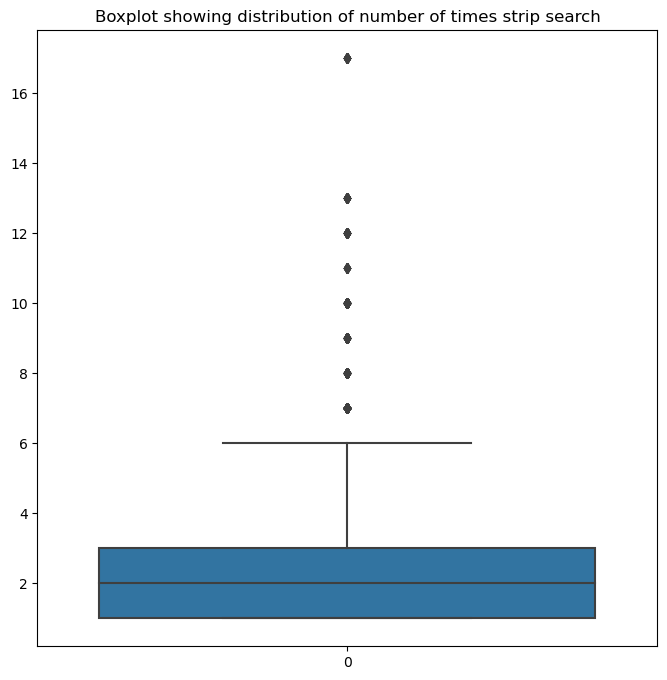

In [19]:
# Create the Boxplot
plt.figure(figsize=(8,8))
sns.boxplot(data=result['No_time_StripSearched'])
plt.title('Boxplot showing distribution of number of times strip search')
plt.show()

In [20]:
import plotly.express as px

lst_a = result[result['Perceived_Race'] == "White"]['No_time_StripSearched']
lst_b = result[result['Perceived_Race'] == "South Asian"]['No_time_StripSearched']
lst_c = result[result['Perceived_Race'] == 'Unknown or Legacy']['No_time_StripSearched']
lst_d = result[result['Perceived_Race'] == 'Black']['No_time_StripSearched']
lst_e = result[result['Perceived_Race'] == 'Indigenous']['No_time_StripSearched']
lst_f = result[result['Perceived_Race'] == 'East/Southeast Asian']['No_time_StripSearched']
lst_g = result[result['Perceived_Race'] ==  'Latino']['No_time_StripSearched']
lst_h = result[result['Perceived_Race'] == 'Middle-Eastern']['No_time_StripSearched']


# Pandas dataframe
data = pd.DataFrame({"White": lst_a, "South Asian": lst_b, 'Unknown or Legacy' : lst_c,'Black' : lst_d, 'Indigenous':lst_e,
                    'East/Southeast Asian': lst_f, 'Latino' : lst_g, 'Middle-Eastern' : lst_h})

fig = px.box(data, title="Comparing the Frequency of Strip Searches for Various Racial Groups Using a Box Plot")
fig.update_yaxes(title_text='No. of times Strip Searched')
fig.update_xaxes(title_text='Racial Groups')
fig.show()

In [21]:
result.head(10)
result['Age_group__at_arrest_'].unique()

<StringArray>
[      'Aged 25 to 34 years',         'Aged 65 and older',
   'Aged 65 years and older',       'Aged 55 to 64 years',
       'Aged 35 to 44 years',       'Aged 45 to 54 years',
       'Aged 18 to 24 years', 'Aged 17 years and younger',
   'Aged 17 years and under']
Length: 9, dtype: string

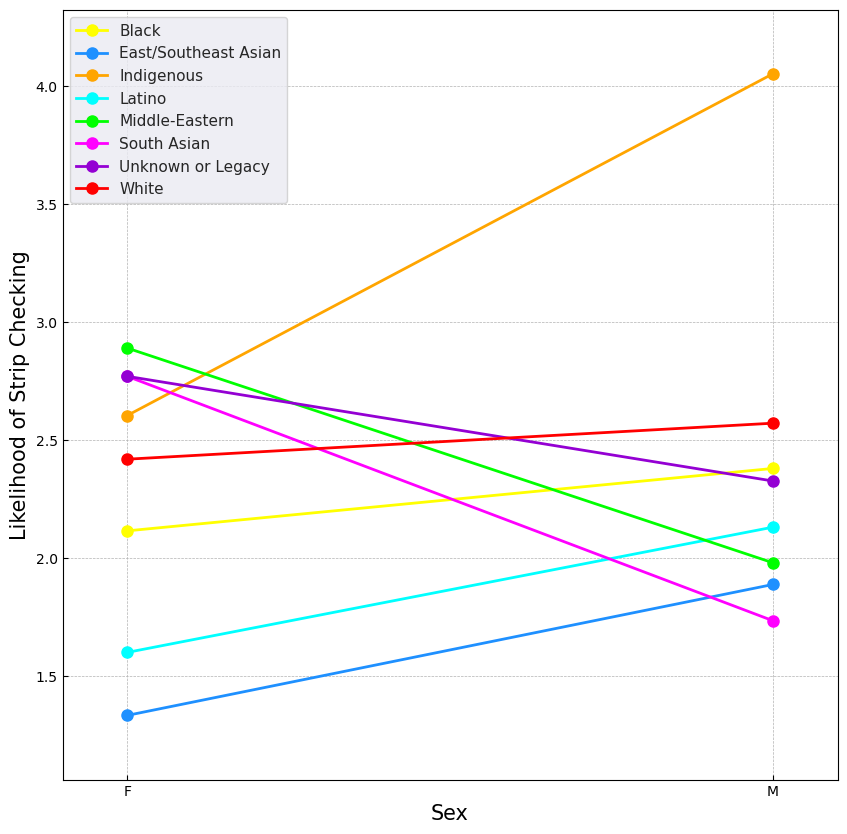

In [22]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
result.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(10, 10))
fig = interaction_plot(
    x = result['Sex'].astype(object),
    trace = result['Perceived_Race'].astype(object),
    response = result['No_time_StripSearched'],
    colors=["yellow", "dodgerblue","orange",'aqua' , "lime" , "magenta" , "darkviolet" , "red"],
    markers=["o", "o" , "o", "o" , "o" , "o" , "o" , "o"],
    ms=8,
    ax=ax,
    xlabel = "No. of times Strip Searched")
plt.xlabel('Sex', fontsize=15)
plt.ylabel("Likelihood of Strip Checking", fontsize=15)
sns.set(font_scale = 1)
plt. legend(loc='upper center', prop={'size': 10})
plt.legend(loc='upper left')
plt.show()


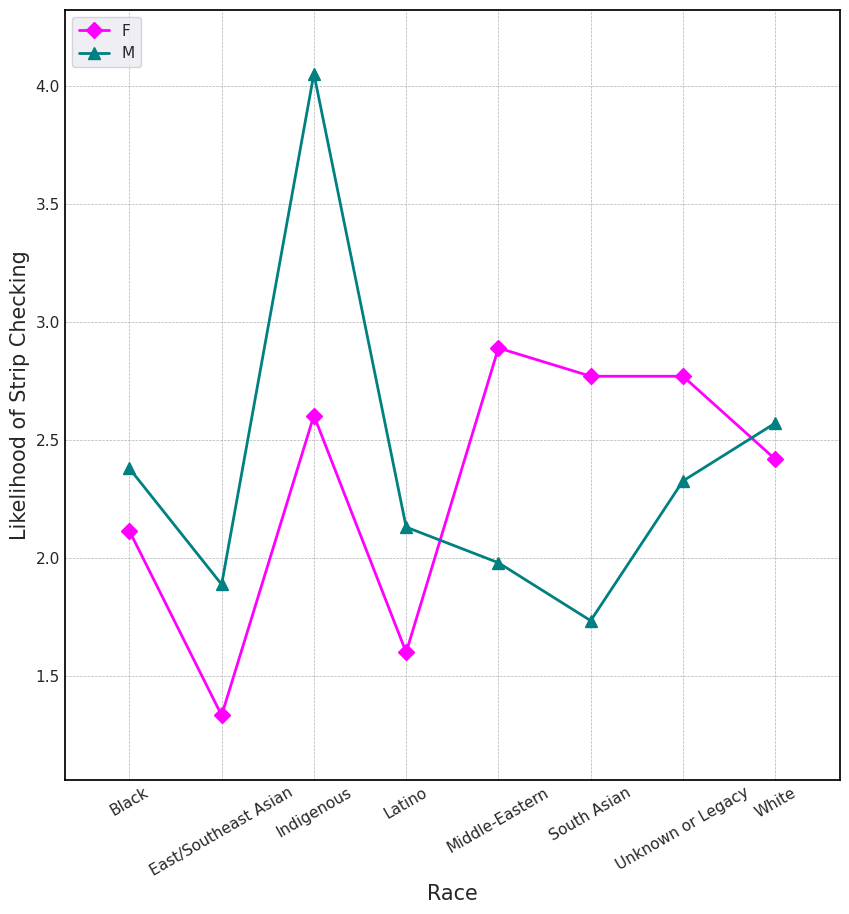

In [23]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
fig, ax = plt.subplots(figsize=(10, 10))
fig = interaction_plot(
    x = result['Perceived_Race'].astype(object),
    trace = result['Sex'].astype(object),
    response = result['No_time_StripSearched'],
    colors=["fuchsia", "teal"],
    markers=["D", "^"],
    ms=8,
    ax=ax,
    xlabel = "No. of times Strip Searched")
plt.xlabel('Race', fontsize=15)
plt.ylabel("Likelihood of Strip Checking", fontsize=15)
sns.set(font_scale = 1)
plt. legend(loc='upper center', prop={'size': 10})
plt.legend(loc='upper left')
plt.xticks(rotation = 30)
plt.show()


### Independent T-test 

#### T-test between Male vs Female 

In [24]:
#RQ1 T-test
#Sex (M or F)
male_group=result[result['Sex']=='M']['No_time_StripSearched']
female_group=result[result['Sex']=='F']['No_time_StripSearched']
t_stat,p_val=ttest_ind(male_group,female_group,equal_var=False)
print("T-test results: ")
print("T-statistic value: ", t_stat)
print("P-value: ", p_val)

T-test results: 
T-statistic value:  1.096321489005839
P-value:  0.2730808972416106


In [25]:
#Calculate mean and SD
print ('Mean,Male,Female: ',male_group.mean(),female_group.mean())
print ('Standard deviation,Male,Female: ',male_group.std(),female_group.std())
#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(male_group),sms.DescrStatsW(female_group))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
#Welch dof
def welch_dof(x,y):
    dof=(x.var()/x.size+y.var()/y.size)**2/((x.var()/x.size)**2/(x.size-1)+(y.var()/y.size)**2/(y.size-1))
    return dof
print('DOF: ',welch_dof(male_group,female_group))

Mean,Male,Female:  2.4519026620937447 2.3799668874172184
Standard deviation,Male,Female:  2.2772752527103006 2.043964826262613
Confidence interval:  (-0.056752658740525125, 0.2006242080935778)
DOF:  1848.7160447330625


#### T-test between Black vs Non-Black 

In [26]:
#Race (Black or Non-Black)
black_group=result[result['Perceived_Race']=='Black']['No_time_StripSearched']
non_black_group=result[result['Perceived_Race']!='Black']['No_time_StripSearched']
t_stat,p_val=ttest_ind(black_group,non_black_group,equal_var=False)
print("T-test results: ")
print("T-statistic value: ", t_stat)
print("P-value: ", p_val)

T-test results: 
T-statistic value:  -2.3053474415943374
P-value:  0.02119262910013168


In [27]:
#Calculate mean and SD
print ('Mean,Black,Non-Black: ',black_group.mean(),non_black_group.mean())
print ('Standard deviation,Black,Non-Black: ',black_group.std(),non_black_group.std())
#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(black_group),sms.DescrStatsW(non_black_group))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
#Welch dof
print('DOF: ',welch_dof(black_group,non_black_group))

Mean,Black,Non-Black:  2.3510221835580687 2.480723370429253
Standard deviation,Black,Non-Black:  2.230780508878902 2.244015436811057
Confidence interval:  (-0.2400005701414862, -0.01940180360088209)
DOF:  4476.8877950718


#### T-test between Asian vs Non-Asian 

In [28]:
#Race (South Asian or Non-South Asian)
southasian_group=result[result['Perceived_Race']=='South Asian']['No_time_StripSearched']
non_southasian_group=result[result['Perceived_Race']!='South Asian']['No_time_StripSearched']
t_stat,p_val=ttest_ind(southasian_group,non_southasian_group,equal_var=False)
print("T-test results: ")
print("T-statistic value: ", t_stat)
print("P-value: ", p_val)

T-test results: 
T-statistic value:  -6.262180256363677
P-value:  1.376601637025229e-09


In [29]:
#Calculate mean and SD
print ('Mean,South Asian,Non-South Asian: ',southasian_group.mean(),non_southasian_group.mean())
print ('Standard deviation,South Asian,Non-South Asian: ',southasian_group.std(),non_southasian_group.std())
#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(southasian_group),sms.DescrStatsW(non_southasian_group))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
#Welch dof
print('DOF: ',welch_dof(southasian_group,non_southasian_group))

Mean,South Asian,Non-South Asian:  1.842741935483871 2.4609628688408867
Standard deviation,South Asian,Non-South Asian:  1.4961041654991036 2.2593730287601352
Confidence interval:  (-0.8125310437588129, -0.42391082295521837)
DOF:  287.95788967036157


#### T-test between White vs Non-White 

In [30]:
#Race (White or Non-White)
white_group=result[result['Perceived_Race']=='White']['No_time_StripSearched']
non_white_group=result[result['Perceived_Race']!='White']['No_time_StripSearched']
t_stat,p_val=ttest_ind(white_group,non_white_group,equal_var=False)
print("T-test results: ")
print("T-statistic value: ", t_stat)
print("P-value: ", p_val)

T-test results: 
T-statistic value:  3.423782413852683
P-value:  0.0006209910636080656


In [31]:
#Calculate mean and SD
print ('Mean,White,Non-White: ',white_group.mean(),non_white_group.mean())
print ('Standard deviation,White,Non-White: ',white_group.std(),non_white_group.std())
#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(white_group),sms.DescrStatsW(non_white_group))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
#Welch dof
print('DOF: ',welch_dof(white_group,non_white_group))

Mean,White,Non-White:  2.5374475733972437 2.3586275982970197
Standard deviation,White,Non-White:  2.1653148198130014 2.298625388610331
Confidence interval:  (0.07643629873872224, 0.28120365146172566)
DOF:  7225.505120895868


#### T-test between Minors vs Adults 

In [32]:
#Age (Aged 17 years and under or Aged 18 years and above)
aged_17_under_group=result[result['Age_group__at_arrest_']=='Aged 17 years and under']['No_time_StripSearched']
aged_18_above_group=result[result['Age_group__at_arrest_']!='Aged 17 years and under']['No_time_StripSearched']
t_stat,p_val=ttest_ind(aged_17_under_group,aged_18_above_group,equal_var=False)
print("T-test results: ")
print("T-statistic value: ", t_stat)
print("P-value: ", p_val)

T-test results: 
T-statistic value:  -4.7394582896634985
P-value:  0.001987732391423445


In [33]:
#Calculate mean and SD
print ('Mean,Aged 17 years and under,Aged 18 years and above: ',aged_17_under_group.mean(),aged_18_above_group.mean())
print ('Standard deviation,Aged 17 years and under,Aged 18 years and above: ',aged_17_under_group.std(),aged_18_above_group.std())
#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(aged_17_under_group),sms.DescrStatsW(aged_18_above_group))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
#Welch dof
print('DOF: ',welch_dof(aged_17_under_group,aged_18_above_group))

Mean,Aged 17 years and under,Aged 18 years and above:  1.25 2.4413491738358597
Standard deviation,Aged 17 years and under,Aged 18 years and above:  0.7071067811865476 2.2413011141436288
Confidence interval:  (-1.783148352720743, -0.5995499949509765)
DOF:  7.154501928428944


### TWO-WAY ANOVA 

In [34]:
#RQ1 Two-way ANOVA
#Age vs. Race
result["Age_group__at_arrest_"]=pd.Categorical(result['Age_group__at_arrest_'],categories=["Aged 25 to 34 years", "Aged 35 to 44 years", "Aged 18 to 24 years",
 "Aged 45 to 54 years", "Aged 55 to 64 years", "Aged 65 and older",
 "Aged 65 years and older", "Aged 17 years and younger",
 "Aged 17 years and under"])
result["Perceived_Race"]=pd.Categorical(result["Perceived_Race"],categories=["Black", "White", "Latino", "South Asian", "Middle-Eastern",
 "Unknown or Legacy", "East/Southeast Asian", "Indigenous"])
model_1=ols('No_time_StripSearched~C(Age_group__at_arrest_)+C(Perceived_Race)+C(Age_group__at_arrest_):C(Perceived_Race)',data=result).fit()
anova_results=anova_lm(model_1)
print(anova_results)

                                                df        sum_sq    mean_sq  \
C(Age_group__at_arrest_)                       8.0    478.971529  59.871441   
C(Perceived_Race)                              7.0    697.397802  99.628257   
C(Age_group__at_arrest_):C(Perceived_Race)    56.0    509.141361   9.091810   
Residual                                    7271.0  35120.413164   4.830204   

                                                    F        PR(>F)  
C(Age_group__at_arrest_)                    12.395220  8.515125e-18  
C(Perceived_Race)                           20.626097  1.185279e-27  
C(Age_group__at_arrest_):C(Perceived_Race)   1.882283  7.956383e-05  
Residual                                          NaN           NaN  


### Post-hoc: Pairwise Comparison Test 

In [35]:
pair_t = model_1.t_test_pairwise('C(Perceived_Race)')
pair_t.result_frame

coef   std err         t  \
White-Black                             0.076606  0.099182  0.772381   
Latino-Black                           -0.037784  0.343689 -0.109936   
South Asian-Black                      -0.816702  0.261766 -3.119969   
Middle-Eastern-Black                   -0.614105  0.305963 -2.007120   
Unknown or Legacy-Black                 0.022633  0.175184  0.129198   
East/Southeast Asian-Black             -1.101806  0.250235 -4.403084   
Indigenous-Black                        0.791464  0.222052  3.564323   
Latino-White                           -0.114390  0.341139 -0.335317   
South Asian-White                      -0.893309  0.258409 -3.456953   
Middle-Eastern-White                   -0.690711  0.303096 -2.278851   
Unknown or Legacy-White                -0.053973  0.170127 -0.317248   
East/Southeast Asian-White             -1.178412  0.246721 -4.776290   
Indigenous-White                        0.714858  0.218084  3.277898   
South Asian-Latino                     -0.778919  0.418402 -1.861652   
Middle-Eastern-Latino                  -0.576321  0.447384 -1.288204   
Unknown or Legacy-Latino                0.060417  0.370443  0.163094   
East/Southeast Asian-Latino            -1.064022  0.411286 -2.587060   
Indigenous-Latino                       0.829248  0.394773  2.100569   
Middle-Eastern-South Asian              0.202597  0.388010  0.522145   
Unknown or Legacy-South Asian           0.839336  0.296020  2.835402   
East/Southeast Asian-South Asian       -0.285103  0.345768 -0.824549   
Indigenous-South Asian                  1.608167  0.325953  4.933740   
Unknown or Legacy-Middle-Eastern        0.636739  0.335738  1.896535   
East/Southeast Asian-Middle-Eastern    -0.487701  0.380326 -1.282323   
Indigenous-Middle-Eastern               1.405569  0.362405  3.878451   
East/Southeast Asian-Unknown or Legacy -1.124439  0.285874 -3.933339   
Indigenous-Unknown or Legacy            0.768831  0.261559  2.939412   
Indigenous-East/Southeast Asian         1.893270  0.316767  5.976854   

                                               P>|t|  Conf. Int. Low  \
White-Black                             4.399139e-01       -0.117819   
Latino-Black                            9.124633e-01       -0.711513   
South Asian-Black                       1.815776e-03       -1.329840   
Middle-Eastern-Black                    4.477378e-02       -1.213882   
Unknown or Legacy-Black                 8.972047e-01       -0.320779   
East/Southeast Asian-Black              1.082499e-05       -1.592339   
Indigenous-Black                        3.671363e-04        0.356178   
Latino-White                            7.373954e-01       -0.783121   
South Asian-White                       5.494460e-04       -1.399866   
Middle-Eastern-White                    2.270476e-02       -1.284868   
Unknown or Legacy-White                 7.510645e-01       -0.387472   
East/Southeast Asian-White              1.820566e-06       -1.662057   
Indigenous-White                        1.050741e-03        0.287350   
South Asian-Latino                      6.269254e-02       -1.599108   
Middle-Eastern-Latino                   1.977161e-01       -1.453323   
Unknown or Legacy-Latino                8.704488e-01       -0.665759   
East/Southeast Asian-Latino             9.699100e-03       -1.870262   
Indigenous-Latino                       3.571316e-02        0.055378   
Middle-Eastern-South Asian              6.015855e-01       -0.558015   
Unknown or Legacy-South Asian           4.589439e-03        0.259051   
East/Southeast Asian-South Asian        4.096546e-01       -0.962910   
Indigenous-South Asian                  8.246210e-07        0.969204   
Unknown or Legacy-Middle-Eastern        5.792890e-02       -0.021405   
East/Southeast Asian-Middle-Eastern     1.997704e-01       -1.233250   
Indigenous-Middle-Eastern               1.060509e-04        0.695151   
East/Southeast Asian-Unknown or Legacy  8.455308e-05       -1.684835   
Indigenous-

In [36]:
model_1=ols('No_time_StripSearched~C(Age_group__at_arrest_)+C(Perceived_Race)+C(Age_group__at_arrest_):C(Perceived_Race)',data=result).fit()

pw = model_1.t_test_pairwise("C(Age_group__at_arrest_)")
pw.result_frame

coef   std err  \
Aged 35 to 44 years-Aged 25 to 34 years           -0.173357  0.128366   
Aged 18 to 24 years-Aged 25 to 34 years           -0.554533  0.117425   
Aged 45 to 54 years-Aged 25 to 34 years            0.239974  0.174820   
Aged 55 to 64 years-Aged 25 to 34 years           -0.955298  0.285068   
Aged 65 and older-Aged 25 to 34 years             -1.484812  0.736533   
Aged 65 years and older-Aged 25 to 34 years       -0.595923  2.199090   
Aged 17 years and younger-Aged 25 to 34 years     -0.845923  0.203243   
Aged 17 years and under-Aged 25 to 34 years       -1.595923  1.101518   
Aged 18 to 24 years-Aged 35 to 44 years           -0.381176  0.136687   
Aged 45 to 54 years-Aged 35 to 44 years            0.413331  0.188299   
Aged 55 to 64 years-Aged 35 to 44 years           -0.781941  0.293527   
Aged 65 and older-Aged 35 to 44 years             -1.311455  0.739848   
Aged 65 years and older-Aged 35 to 44 years       -0.422566  2.200202   
Aged 17 years and younger-Aged 35 to 44 years     -0.672566  0.214948   
Aged 17 years and under-Aged 35 to 44 years       -1.422566  1.103738   
Aged 45 to 54 years-Aged 18 to 24 years            0.794507  0.181017   
Aged 55 to 64 years-Aged 18 to 24 years           -0.400766  0.288910   
Aged 65 and older-Aged 18 to 24 years             -0.930280  0.738029   
Aged 65 years and older-Aged 18 to 24 years       -0.041391  2.199591   
Aged 17 years and younger-Aged 18 to 24 years     -0.291391  0.208598   
Aged 17 years and under-Aged 18 to 24 years       -1.041391  1.102519   
Aged 55 to 64 years-Aged 45 to 54 years           -1.195272  0.316611   
Aged 65 and older-Aged 45 to 54 years             -1.724786  0.749306   
Aged 65 years and older-Aged 45 to 54 years       -0.835897  2.203401   
Aged 17 years and younger-Aged 45 to 54 years     -1.085897  0.245533   
Aged 17 years and under-Aged 45 to 54 years       -1.835897  1.110100   
Aged 65 and older-Aged 55 to 64 years             -0.529514  0.782407   
Aged 65 years and older-Aged 55 to 64 years        0.359375  2.214876   
Aged 17 years and younger-Aged 55 to 64 years      0.109375  0.333149   
Aged 17 years and under-Aged 55 to 64 years       -0.640625  1.132706   
Aged 65 years and older-Aged 65 and older          0.888889  2.316656   
Aged 17 years and younger-Aged 65 and older        0.638889  0.756443   
Aged 17 years and under-Aged 65 and older         -0.111111  1.320697   
Aged 17 years and younger-Aged 65 years and older -0.250000  2.205838   
Aged 17 years and under-Aged 65 years and older   -1.000000  2.457184   
Aged 17 years and under-Aged 17 years and younger -0.750000  1.114929   

                                                          t     P>|t|  \
Aged 35 to 44 years-Aged 25 to 34 years           -1.350486  0.176902   
Aged 18 to 24 years-Aged 25 to 34 years           -4.722439  0.000002   
Aged 45 to 54 years-Aged 25 to 34 years            1.372696  0.169889   
Aged 55 to 64 years-Aged 25 to 34 years           -3.351129  0.000809   
Aged 65 and older-Aged 25 to 34 years             -2.015948  0.043842   
Aged 65 years and older-Aged 25 to 34 years       -0.270986  0.786409   
Aged 17 years and younger-Aged 25 to 34 years     -4.162122  0.000032   
Aged 17 years and under-Aged 25 to 34 years       -1.448840  0.147426   
Aged 18 to 24 years-Aged 35 to 44 years           -2.788676  0.005306   
Aged 45 to 54 years-Aged 35 to 44 years            2.195077  0.028190   
Aged 55 to 64 years-Aged 35 to 44 years           -2.663948  0.007740   
Aged 65 and older-Aged 35 to 44 years             -1.772600  0.076337   
Aged 65 years and older-Aged 35 to 44 years       -0.192058  0.847702   
Aged 17 years and younger-Aged 35 to 44 years     -3.128977  0.001761   
Aged 17 years and under-Aged 35 to 44 years       -1.288863  0.197487   
Aged 45 to 54 years-Aged 18 to 24 years            4.389118  0.000012   
Aged 55 to 64 years-Aged 18 to 24 years           -1.387165  0.165434   
Aged 65 and older-Aged 18 to 24 years  

## RQ2: Likelihood of Strip Check based on various search reasons 

### Transform and prepare data for testing 

In [37]:
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

#we create a separate df for demographic variable so that we can join them with our final table at the end
demographics = df[['PersonID','Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Arrest_Year']].drop_duplicates(subset = 'PersonID', keep = 'first')

#group data by personID to see how many times each person was arrested
df1 = df.groupby(['PersonID'], as_index=False)['ArrestID'].agg({'No_of_Arrest':'count'})

#group by PersonID to see how many times the search reason was causeInjury or AssistEscape etc
df2 = df.groupby(['PersonID'], as_index=False)['SearchReason_CauseInjury'].agg({'CauseInjury':'sum'})
df3 = df.groupby(['PersonID'], as_index=False)['SearchReason_AssistEscape'].agg({'AssistEscape':'sum'})
df4 = df.groupby(['PersonID'], as_index=False)['SearchReason_PossessWeapons'].agg({'PossessWeapons':'sum'})
df5 = df.groupby(['PersonID'], as_index=False)['SearchReason_PossessEvidence'].agg({'PossessEvidence':'sum'})

#merge all the dataframes together
df6 = df1.merge(df2,on='PersonID').merge(df3,on='PersonID').merge(df4,on='PersonID').merge(df5,on='PersonID')
df6 = df6.merge(demographics,on='PersonID')

df6.head(10)

PersonID  No_of_Arrest  CauseInjury  AssistEscape  PossessWeapons  \
0    300000             1          0.0           0.0             0.0   
1    300001             1          0.0           0.0             0.0   
2    300002             1          0.0           0.0             0.0   
3    300003             8          1.0           0.0             1.0   
4    300004             1          0.0           0.0             0.0   
5    300005             1          0.0           0.0             0.0   
6    300006             2          0.0           0.0             0.0   
7    300007             8          1.0           1.0             0.0   
8    300008             1          0.0           0.0             0.0   
9    300009             1          0.0           0.0             0.0   

   PossessEvidence        Perceived_Race Sex      Age_group__at_arrest_  \
0              0.0  East/Southeast Asian   M        Aged 35 to 44 years   
1              0.0                 White   F  Aged 17 years and younger   
2              0.0                 White   M        Aged 35 to 44 years   
3              0.0                 White   M        Aged 25 to 34 years   
4              0.0                 Black   M        Aged 25 to 34 years   
5              0.0           South Asian   M        Aged 45 to 54 years   
6              0.0        Middle-Eastern   M        Aged 55 to 64 years   
7              0.0           South Asian   M        Aged 25 to 34 years   
8              0.0                 Black   M        Aged 25 to 34 years   
9              0.0                 White   M        Aged 35 to 44 years   

   Arrest_Year  
0         2020  
1         2020  
2         2020  
3         2020  
4         2020  
5         2020  
6         2020  
7         2020  
8         2020  
9         2020

In [38]:
#count number of times a person is strip searched
df1 = df.groupby(['PersonID'], as_index=False)['StripSearch'].agg({'StripSearched':'sum'})

#merge with the other table
result = df6.merge(df1,on='PersonID')

result.head(10)

PersonID  No_of_Arrest  CauseInjury  AssistEscape  PossessWeapons  \
0    300000             1          0.0           0.0             0.0   
1    300001             1          0.0           0.0             0.0   
2    300002             1          0.0           0.0             0.0   
3    300003             8          1.0           0.0             1.0   
4    300004             1          0.0           0.0             0.0   
5    300005             1          0.0           0.0             0.0   
6    300006             2          0.0           0.0             0.0   
7    300007             8          1.0           1.0             0.0   
8    300008             1          0.0           0.0             0.0   
9    300009             1          0.0           0.0             0.0   

   PossessEvidence        Perceived_Race Sex      Age_group__at_arrest_  \
0              0.0  East/Southeast Asian   M        Aged 35 to 44 years   
1              0.0                 White   F  Aged 17 years and younger   
2              0.0                 White   M        Aged 35 to 44 years   
3              0.0                 White   M        Aged 25 to 34 years   
4              0.0                 Black   M        Aged 25 to 34 years   
5              0.0           South Asian   M        Aged 45 to 54 years   
6              0.0        Middle-Eastern   M        Aged 55 to 64 years   
7              0.0           South Asian   M        Aged 25 to 34 years   
8              0.0                 Black   M        Aged 25 to 34 years   
9              0.0                 White   M        Aged 35 to 44 years   

   Arrest_Year  StripSearched  
0         2020              0  
1         2020              0  
2         2020              0  
3         2020              1  
4         2020              0  
5         2020              0  
6         2020              0  
7         2020              1  
8         2020              0  
9         2020              0

In [39]:
Study_group = result[(result['Age_group__at_arrest_'] == 'Aged 17 years and under') | 
                     (result['Age_group__at_arrest_'] == 'Aged 17 years and younger')]

Study_group = Study_group[Study_group['StripSearched']>=1]
Study_group.head(2)

PersonID  No_of_Arrest  CauseInjury  AssistEscape  PossessWeapons  \
343    300343             3          0.0           0.0             0.0   
380    300380             1          1.0           0.0             0.0   

     PossessEvidence  Perceived_Race Sex      Age_group__at_arrest_  \
343              0.0  Middle-Eastern   M  Aged 17 years and younger   
380              0.0           White   M  Aged 17 years and younger   

     Arrest_Year  StripSearched  
343         2020              1  
380         2020              1

### Exploratory Data Analysis 

In [40]:
import plotly.express as px

lst_a = Study_group[Study_group['CauseInjury'] >= 1.]['StripSearched']
lst_b = Study_group[Study_group['AssistEscape'] >= 1.]['StripSearched']
lst_c = Study_group[Study_group['PossessEvidence'] >= 1.]['StripSearched']
lst_d = Study_group[Study_group['PossessWeapons'] >= 1.]['StripSearched']


# Pandas dataframe
data = pd.DataFrame({"Assault": lst_a, "Assist in Escape": lst_b, 'Evidence Possession' : lst_c,'Weapon Possession' : lst_d})


fig = px.box(data, title="Comparing the Frequency of Strip Searches for Various Search Reasons Using a Box Plot")
fig.update_yaxes(title_text='No. of times Strip Searched')
fig.update_xaxes(title_text='Reasons for Search')
fig.show()


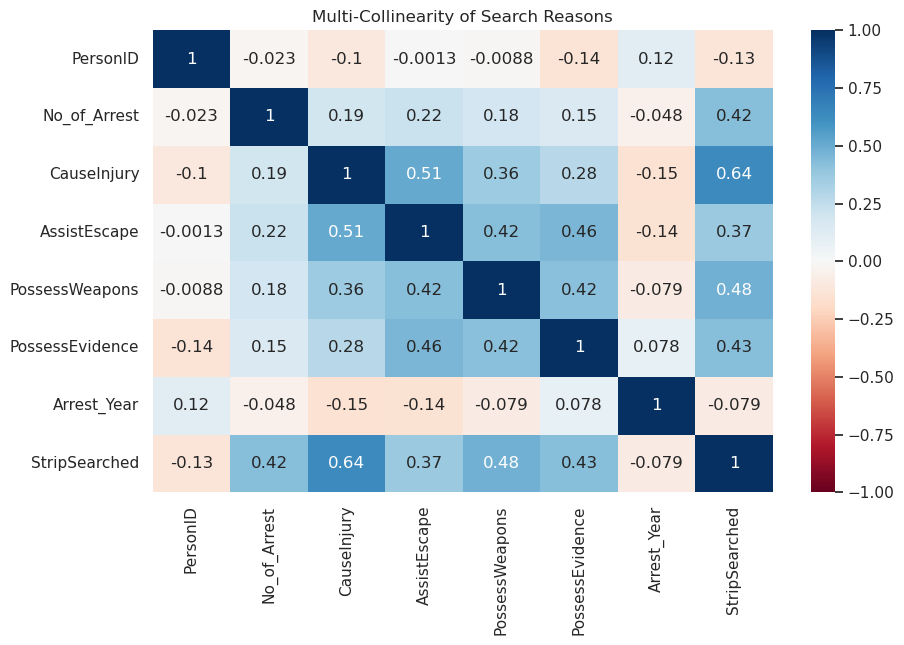

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
corr = Study_group.corr()
sns.heatmap(corr , cmap='RdBu', vmin=-1, vmax=1, annot=True)
ax.set_title("Multi-Collinearity of Search Reasons")
plt.show()

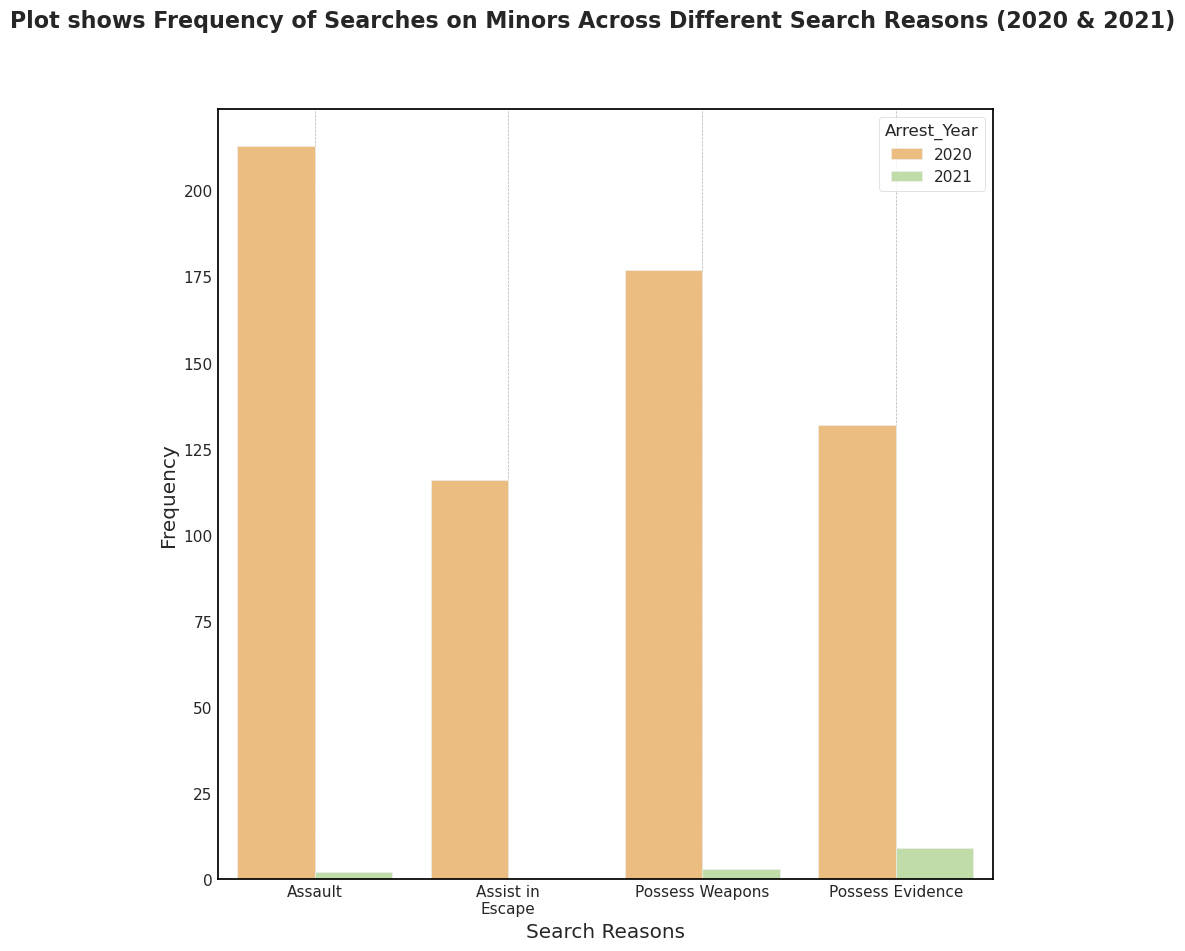

In [42]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

df_copy = df[['Arrest_Year' , 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence' , 'Sex', 'Age_group__at_arrest_' , 'StripSearch']]
df_copy = df_copy[(df_copy['Age_group__at_arrest_'] == 'Aged 17 years and under') | 
                     (df_copy['Age_group__at_arrest_'] == 'Aged 17 years and younger')]
df_copy.dropna()
df_copy = df_copy.groupby(['Arrest_Year'], as_index = False)[['SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence']].sum()
df_copy = pd.melt(df_copy , id_vars = 'Arrest_Year', value_vars = ['SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence'] , var_name = 'SearchReasons')

f, ax = plt.subplots(1, 1, figsize=(10,10))
f.suptitle('Plot shows Frequency of Searches on Minors Across Different Search Reasons (2020 & 2021)',fontweight='bold',fontsize=16)


sns.barplot(data=df_copy, x = 'SearchReasons', y = 'value' , hue = 'Arrest_Year' , ax=ax,palette = "Spectral")
ax.set_xticklabels(['Assault', 'Assist in\nEscape' , 'Possess Weapons' , 'Possess Evidence'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Search Reasons')
ax.grid()

plt.show()

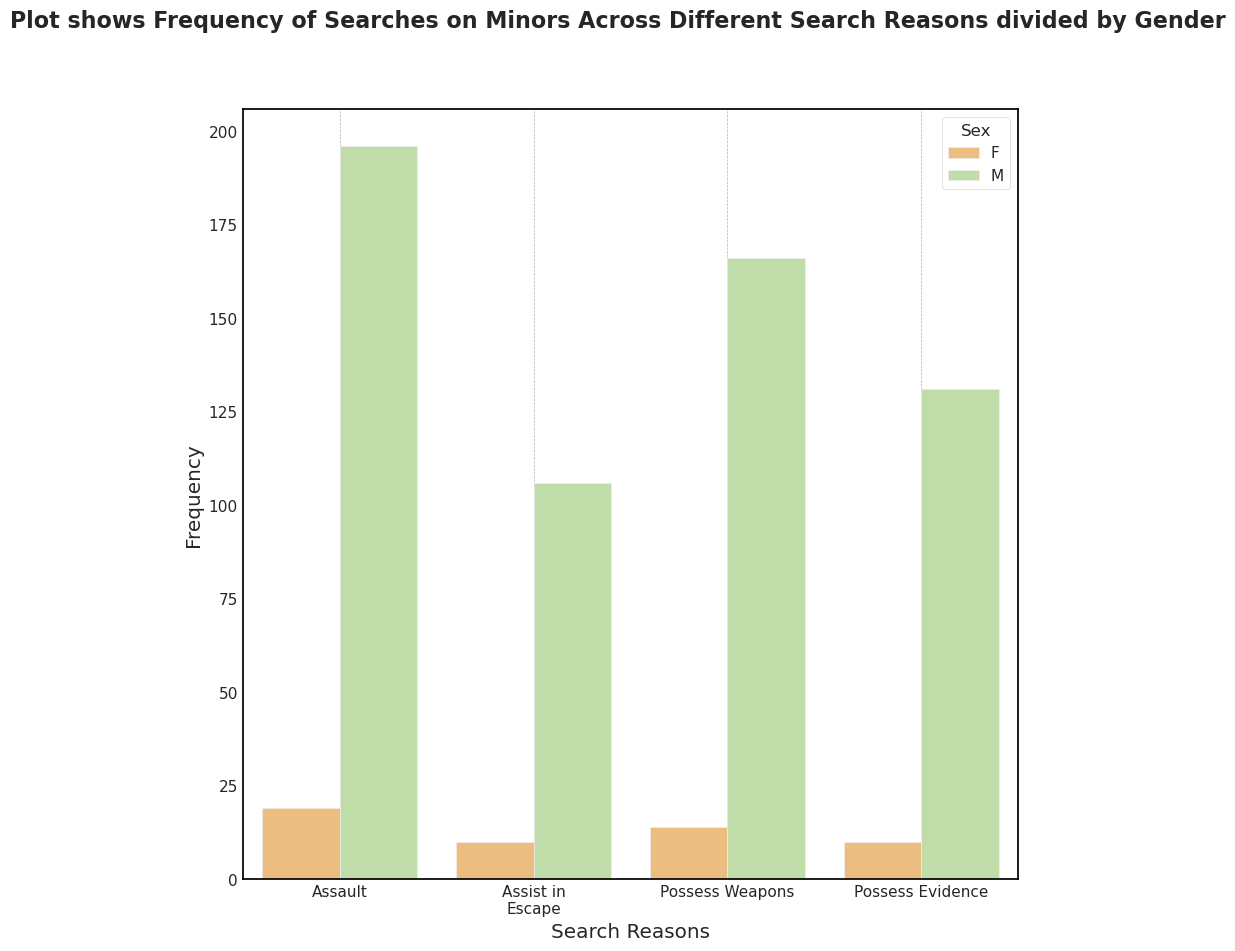

In [43]:
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})


df_copy = df[['Arrest_Year' , 'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence' , 'Sex', 'Age_group__at_arrest_' , 'StripSearch']]
df_copy = df_copy[(df_copy['Age_group__at_arrest_'] == 'Aged 17 years and under') | 
                     (df_copy['Age_group__at_arrest_'] == 'Aged 17 years and younger')]
df_copy.dropna()
df_copy = df_copy.groupby(['Sex'], as_index = False)[['SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence']].sum()
df_copy = pd.melt(df_copy , id_vars = 'Sex', value_vars = ['SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence'] , var_name = 'SearchReasons')

f, ax = plt.subplots(1, 1, figsize=(10,10))
f.suptitle('Plot shows Frequency of Searches on Minors Across Different Search Reasons divided by Gender',fontweight='bold',fontsize=16)


sns.barplot(data=df_copy, x = 'SearchReasons', y = 'value' , hue = 'Sex' , ax=ax,palette = "Spectral")
ax.set_xticklabels(['Assault', 'Assist in\nEscape' , 'Possess Weapons' , 'Possess Evidence'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Search Reasons')
ax.grid()

plt.show()

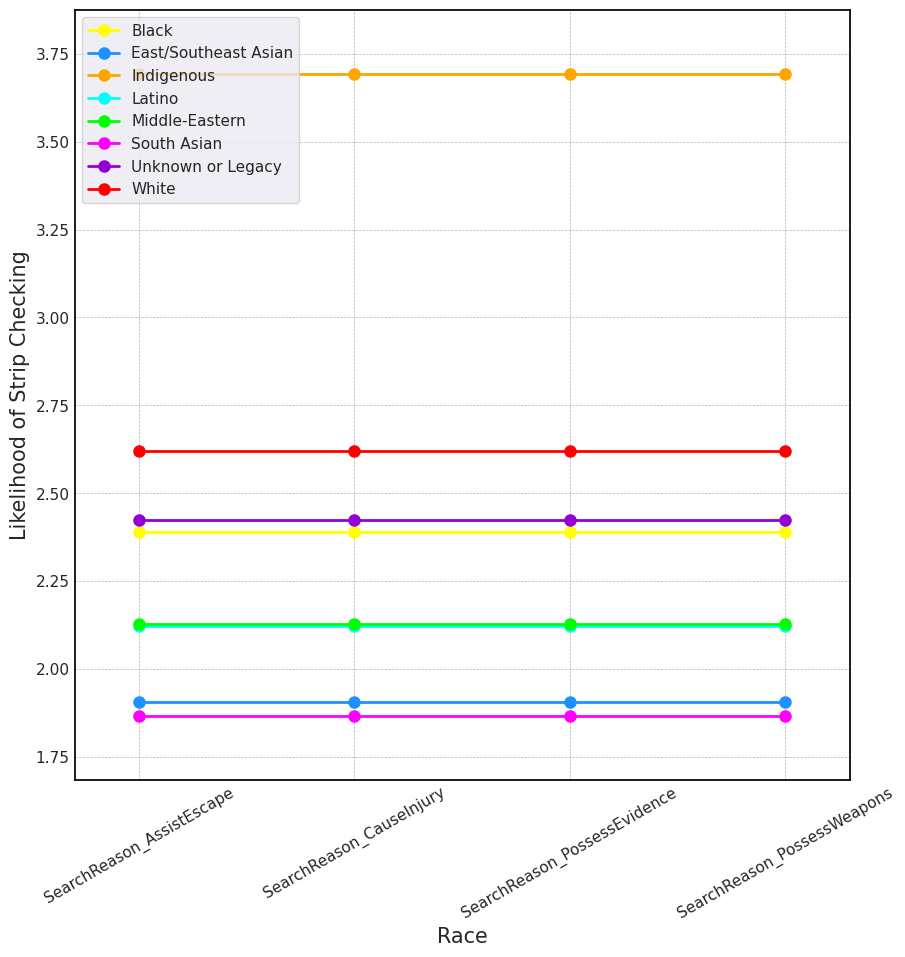

In [44]:
df1=df[df['StripSearch']==1]
df2=df1.groupby('PersonID',as_index=False)['PersonID'].agg({'StripSearched':'count'})
result=pd.merge(df2,df1,on=['PersonID'])
result.head(2)


df1 = pd.melt(result , id_vars = ['StripSearched', 'Perceived_Race' , 'Sex'], value_vars = ['SearchReason_CauseInjury', 'SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence'] , var_name = 'SearchReasons', value_name = 'value')
#df1 = df1[df1['value']>=1.]
df1


plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

fig, ax = plt.subplots(figsize=(10, 10))
fig = interaction_plot(
    x = df1['SearchReasons'].astype(object),
    trace = df1['Perceived_Race'].astype(object),
    response = df1['StripSearched'],
     colors=["yellow", "dodgerblue","orange",'aqua' , "lime" , "magenta" , "darkviolet" , "red"],
    markers=["o", "o" , "o", "o" , "o" , "o" , "o" , "o"],
    ms=8,
    ax=ax,
    xlabel = "No. of times Strip Searched")
plt.xlabel('Race', fontsize=15)
plt.ylabel("Likelihood of Strip Checking", fontsize=15)
sns.set(font_scale = 1)
plt. legend(loc='upper center', prop={'size': 10})
plt.legend(loc='upper left')
plt.xticks(rotation = 30)
plt.show()

### Independent T-test 

#### T-test between Strip Checking vs Assault 

In [45]:
sample1 = Study_group[(Study_group['CauseInjury'] >= 1.)]['StripSearched']
sample2 = Study_group[(Study_group['CauseInjury'] < 1.)]['StripSearched']

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)


#Calculate mean and SD
print ('Mean, Likelihood of strip checking for suspects of assault: ',sample1.mean(), sample2.mean())
print('\n')
print ('Standard deviation, Likelihood of strip checking for suspects of assault: ', sample1.std() , sample2.std())
print('\n')

#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(sample1),sms.DescrStatsW(sample2))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
print('\n')

#Welch dof
print('DOF: ',welch_dof(sample1,sample2))

T-statistic value:  1.1528353479735463
P-Value:  0.2502640572123876
Mean, Likelihood of strip checking for suspects of assault:  1.3908045977011494 1.2380952380952381


Standard deviation, Likelihood of strip checking for suspects of assault:  0.8025439586264866 0.6172133998483676


Confidence interval:  (-0.07227245203355098, 0.3776911712453735)


DOF:  78.20579909392592


#### T-test between Strip Checking vs Assist Escape 

In [46]:
sample1 = Study_group[(Study_group['AssistEscape'] >= 1.)]['StripSearched']
sample2 = Study_group[(Study_group['AssistEscape'] < 1.)]['StripSearched']

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

#null hypothesis rejected

#Calculate mean and SD
print ('Mean, Likelihood of strip checking for suspects of assist escape: ',sample1.mean(), sample2.mean())
print('\n')
print ('Standard deviation, Likelihood of strip checking for suspects of assist escape: ', sample1.std() , sample2.std())
print('\n')

#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(sample1),sms.DescrStatsW(sample2))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
print('\n')

#Welch dof
print('DOF: ',welch_dof(sample1,sample2))

T-statistic value:  2.8378230180089847
P-Value:  0.004979096773234685
Mean, Likelihood of strip checking for suspects of assist escape:  1.5145631067961165 1.2212389380530972


Standard deviation, Likelihood of strip checking for suspects of assist escape:  0.9274049570235332 0.5627501550792494


Confidence interval:  (0.08480915505473235, 0.5018391824313062)


DOF:  165.0272065084936


#### T-test between Strip Checking vs Possess Evidence 

In [47]:
sample1 = Study_group[(Study_group['PossessEvidence'] >= 1.)]['StripSearched']
sample2 = Study_group[(Study_group['PossessEvidence'] < 1.)]['StripSearched']

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

#null hypothesis rejected


print('\n')
#Calculate mean and SD
print ('Mean, Likelihood of strip checking for suspects of possess evidence: ',sample1.mean(), sample2.mean())
print('\n')
print ('Standard deviation, Likelihood of strip checking for suspects of possess evidence: ', sample1.std() , sample2.std())
print('\n')

#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(sample1),sms.DescrStatsW(sample2))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
print('\n')

#Welch dof
print('DOF: ',welch_dof(sample1,sample2))

T-statistic value:  2.583779853265969
P-Value:  0.010437835582966445


Mean, Likelihood of strip checking for suspects of possess evidence:  1.4830508474576272 1.2142857142857142


Standard deviation, Likelihood of strip checking for suspects of possess evidence:  0.8646233392408279 0.6134237196211232


Confidence interval:  (0.06990999234118453, 0.4676202740026414)


DOF:  209.13722281153926


#### T-test between Strip Checking vs Possess Weapons

In [48]:
sample1 = Study_group[(Study_group['PossessWeapons'] >= 1.)]['StripSearched']
sample2 = Study_group[(Study_group['PossessWeapons'] < 1.)]['StripSearched']

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

#Calculate mean and SD
print('\n')
print ('Mean, Likelihood of strip checking for suspects of possess weapons: ',sample1.mean(), sample2.mean())
print('\n')
print ('Standard deviation, Likelihood of strip checking for suspects of possess weapons: ', sample1.std() , sample2.std())
print('\n')

#Compute confidence interval
cm=sms.CompareMeans(sms.DescrStatsW(sample1),sms.DescrStatsW(sample2))
print('Confidence interval: ',cm.tconfint_diff(usevar='unequal'))
print('\n')

#Welch dof
print('DOF: ',welch_dof(sample1,sample2))

T-statistic value:  -0.08424634631608076
P-Value:  0.9329393274782087


Mean, Likelihood of strip checking for suspects of possess weapons:  1.3581081081081081 1.3676470588235294


Standard deviation, Likelihood of strip checking for suspects of possess weapons:  0.7469678856863504 0.8268698712742357


Confidence interval:  (-0.24235471599433042, 0.22327681456348777)


DOF:  119.03560022401169


### ONE-WAY ANOVA

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Study_group.head(4)

df_ = pd.melt(Study_group , id_vars = 'StripSearched', value_vars = ['CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence'] , var_name = 'SearchReasons', value_name = 'value')
df_ = df_[df_['value']>=1.]

# Define the ANOVA model using the formula API
model = ols('value ~ C(SearchReasons)', data=df_).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq     df       F    PR(>F)
C(SearchReasons)    0.665982    3.0  0.6734  0.568619
Residual          177.687609  539.0     NaN       NaN


### F & P value of the two significant groups 

In [50]:
from scipy import stats
group1 = Study_group[Study_group['AssistEscape']>=1.]['StripSearched']
group2 = Study_group[Study_group['PossessEvidence']>=1.]['StripSearched']

F, p = stats.f_oneway(group1, group2)

print(F, p)

0.06826691720352573 0.7941226096668863


### TWO-WAY ANOVA 

In [51]:
df_ = pd.melt(Study_group , id_vars = ['StripSearched', 'Perceived_Race' , 'Sex'], value_vars = ['CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence'] , var_name = 'SearchReasons', value_name = 'value')
df_ = df_[df_['value']>=1.]

model=ols('StripSearched~C(SearchReasons)+C(Perceived_Race)+C(Sex):C(Perceived_Race)',data=df_).fit()
anova_results=anova_lm(model,typ=2)
print(anova_results)

                              sum_sq     df         F    PR(>F)
C(SearchReasons)            2.045926    3.0  1.015361  0.385470
C(Perceived_Race)           9.840458    7.0  2.092999  0.064864
C(Sex):C(Perceived_Race)    7.640840    8.0  1.422011  0.184277
Residual                  353.963879  527.0       NaN       NaN
